## Text to Images

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import io
import os
import warnings

from IPython.display import display
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation

<IPython.core.display.Javascript object>

In [3]:
STABILITY_API_KEY = os.environ.get("STABILITY_API_KEY")

<IPython.core.display.Javascript object>

### Parameters

#### prompt
- Accepts singular as well as multiple prompts with weights

#### steps
- Number of diffusion/inference steps
- Default: 30
- Allowed: 10-150

#### num_samples	
- Number of images to generate. 
- Default: 1
- Allowed: 1-10


#### cfg_scale	
- Influences how strongly the engine (image generation) is guided to match the text prompt.
- Default: 7
- Allowed: 1-35
- v2-x models respond well to lower CFG, 4-8
- v1-x models respond well to a higher range, 7-14

                   
#### height
- Maximum # of pixel is 1048576, for square images (1024,1024)

#### width
- Maximum # of pixel is 1048576, for square images (1024,1024)


#### seed
- Default: 0 
- Allowed: 0 - 2147483647

#### start_schedule
- Skips a proportion of the start of the diffusion steps, allowing the init_image
 to influence the final generated image. 
- Lower values will result in more influence from the init_image
- Higher values will result in more influence from the diffusion steps. 
- A value of 0 would simply return you the  init_image
- A value of 1 would return you a completely different image

#### engine
- stable-diffusion-v1
- stable-diffusion-v1-5
etc


#### sampler
- denoise image generation
- SAMPLER_K_DPMPP_2M etc


In [4]:
engine = "stable-diffusion-xl-beta-v2-2-2"
engine = "stable-diffusion-v1-5"
stability_api = client.StabilityInference(
    key=STABILITY_API_KEY, verbose=False, engine=engine,
)

<IPython.core.display.Javascript object>

In [5]:
response = stability_api.generate(
    prompt="expansive landscape rolling greens with blue daisies and \
    weeping willow trees under a blue alien sky, artstation, masterful, ghibli",
    seed=992446758,
    steps=30,
    cfg_scale=8.0,
    width=512,
    height=512,
    samples=2,
    sampler=generation.SAMPLER_K_DPMPP_2M,
)

<IPython.core.display.Javascript object>

image file name:  images/image_3671528036.png


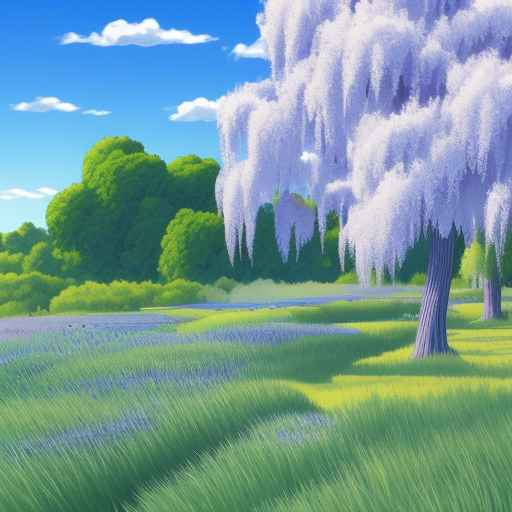

image file name:  images/image_992446758.png


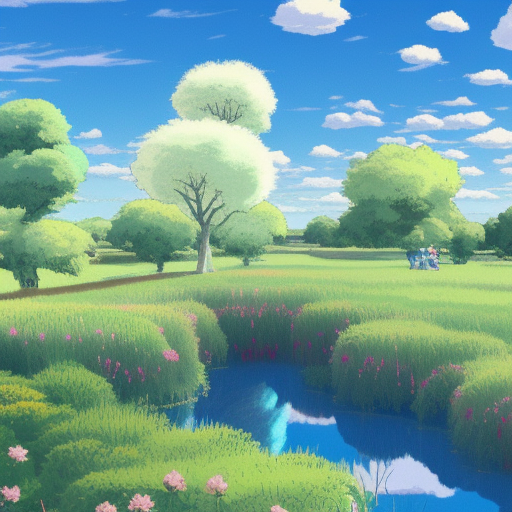

<IPython.core.display.Javascript object>

In [6]:
for resp in response:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn("Safety filters activated")
        if artifact.type == generation.ARTIFACT_IMAGE:
            file_name = "images/image_" + str(artifact.seed) + ".png"
            print("image file name: ", file_name)
            with open(file_name, "wb") as image_file:
                image_file.write(artifact.binary)
            img = Image.open(io.BytesIO(artifact.binary))
            display(img)

In [7]:
#display(Image.open("images/image_2439.png"))


<IPython.core.display.Javascript object>